# Performance of XGBoost Emulator

- This script shows the performance of XGBoost emulators
- The results are shown in Table 4

In [1]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
import pickle
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import gc

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Calculate squared_error
def squared_error(y_ori,y_pred):
    return np.sum((y_pred - y_ori) * (y_pred - y_ori))

# Calculate coefficient of determination
def coefficient_of_determination(y_ori,y_pred):
    """
    ref: https://en.wikipedia.org/wiki/Coefficient_of_determination
    """
    y_mean_pred = np.full(np.asarray(y_ori).shape, np.mean(y_ori)) 
    SSres = squared_error(y_ori, y_pred)
    SStot = squared_error(y_ori, y_mean_pred)
    return 1 - (SSres/SStot)

# Calculate index of agreement
def index_agreement(ori,pred):
    """
    ref: https://www.rforge.net/doc/packages/hydroGOF/d.html
    index of agreement
    input:
        pred: simulated
        ori: observed
    output:
        ia: index of agreement
    """
    ia = 1 -(np.sum((ori-pred)**2))/(np.sum(
        (np.abs(pred-np.mean(ori))+np.abs(ori-np.mean(ori)))**2))
    return ia

In [2]:
vari = ["DMS_SRF","H2O2_SRF","H2SO4_SRF","O3_SRF","SO2_SRF","SOAG_SRF",
        'Mass_so4','Mass_bc','Mass_ncl','Mass_dst','Mass_pom','Mass_soa',
        "T", "RELHUM", "SZA"]
chi_ls = ['chi_abd','chi_opt1','chi_opt2','chi_hyg']
vari_ms = vari+chi_ls

case_ensemble = {}
case_ls = []
for i in range(1,5):
    case_ensemble["case_"+str(i)] = pd.read_csv("../data/test_"+str(i)+".csv")
    case_ls.append(pd.read_csv("../data/test_"+str(i)+".csv"))
case_describe = {}
case_describe["case_1"] = "sea salt and dust" 
case_describe["case_2"] = "dust"
case_describe["case_3"] = "sea salt"
case_describe["case_4"] = "none"

df_test_ori = pd.concat(case_ls)
#df_test.describe()


case_ensemble = {}
case_ls = []
for i in range(1,5):
    case_ensemble["case_"+str(i)] = pd.read_csv("../data/train_"+str(i)+".csv")
    case_ls.append(pd.read_csv("../data/train_"+str(i)+".csv"))
case_describe = {}
case_describe["case_1"] = "sea salt and dust" 
case_describe["case_2"] = "dust"
case_describe["case_3"] = "sea salt"
case_describe["case_4"] = "none"

df_train_ori = pd.concat(case_ls)
#df_train.describe()

In [3]:
def predict_chi_ls(df, vari, chi_ls):
    df_copy = df.copy().dropna()
    for chi in chi_ls:
        print(chi)
        XGBreg_load=pickle.load(open("./xgb_model/"+chi+".dat","rb"))
        X=df_copy[vari]
        Y_ref=df_copy[chi]
        df_predictions = XGBreg_load.predict(X)
        
        plt.figure(figsize=(10,10))
        plt.scatter(df_predictions*100,Y_ref*100,s = 6,color="purple",alpha=0.5)
        plt.plot([0,100],[0,100],color="red",alpha=0.6)
        #plt.title("Predicted om vs Actual om")
        plt.ylabel("Reference, %",fontsize=20)
        plt.xlabel("Prediction, %",fontsize=20)
        plt.xlim(0,100)
        plt.ylim(0,100)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()
        print('The cc is:',
              "{0:.3f}".format(np.corrcoef(np.asarray(Y_ref),np.asarray(df_predictions))[0][1]))
        print('The coefficient of determination is:',
              "{0:.3f}".format(coefficient_of_determination(Y_ref,df_predictions)))
        print('The coefficient of determination (Using sklearn) is:', 
              "{0:.3f}".format(metrics.r2_score(Y_ref, df_predictions)))
        print('The index of agreement is:',
              "{0:.3f}".format(index_agreement(Y_ref,df_predictions)))
        print('The root mean squared error is:', 
              "{0:.3f}".format(np.sqrt(mean_squared_error(Y_ref, df_predictions))))
        print('The mean absolute error is:', 
              "{0:.3f}".format(metrics.mean_absolute_error(Y_ref, df_predictions)))
        print('The median absolute error is:', 
              "{0:.3f}".format(metrics.median_absolute_error(Y_ref, df_predictions)))
        xgb.plot_importance(XGBreg_load)
        plt.show()
        print("####################################")
        print("\n")

## Apply to training data

chi_abd


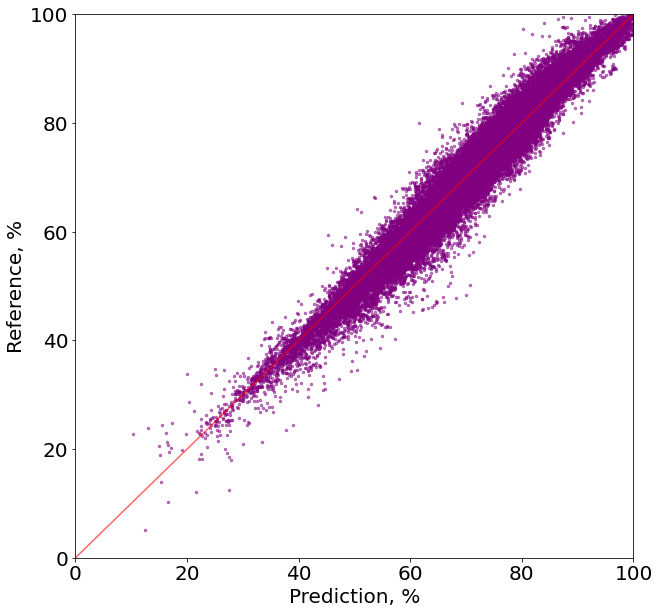

The cc is: 0.979
The coefficient of determination is: 0.958
The coefficient of determination (Using sklearn) is: 0.958
The index of agreement is: 0.989
The root mean squared error is: 0.029
The mean absolute error is: 0.022
The median absolute error is: 0.017


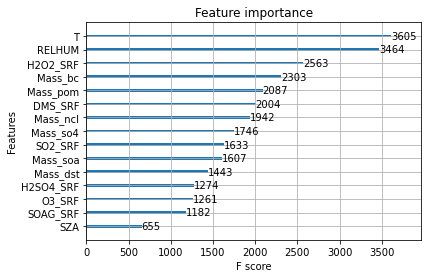

####################################


chi_opt1


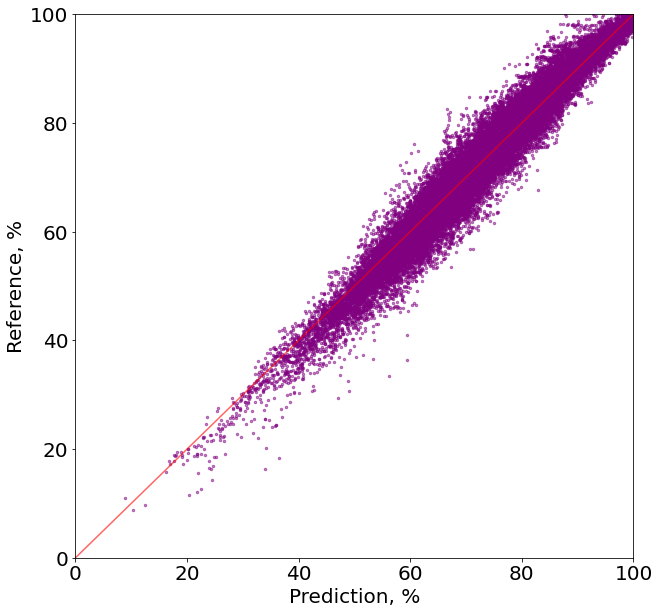

The cc is: 0.979
The coefficient of determination is: 0.958
The coefficient of determination (Using sklearn) is: 0.958
The index of agreement is: 0.989
The root mean squared error is: 0.029
The mean absolute error is: 0.022
The median absolute error is: 0.016


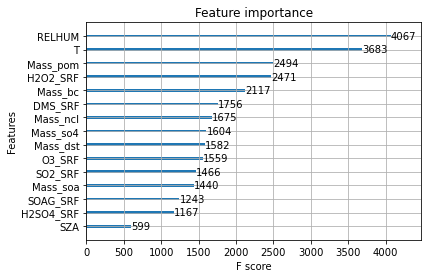

####################################


chi_opt2


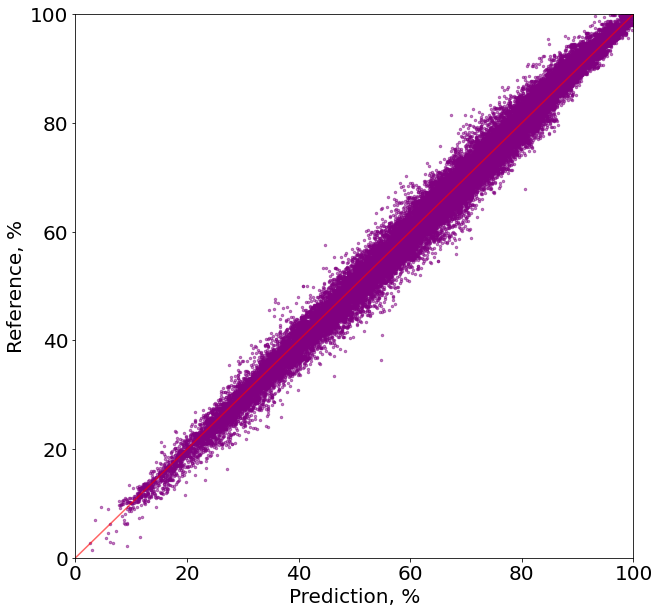

The cc is: 0.994
The coefficient of determination is: 0.988
The coefficient of determination (Using sklearn) is: 0.988
The index of agreement is: 0.997
The root mean squared error is: 0.022
The mean absolute error is: 0.016
The median absolute error is: 0.012


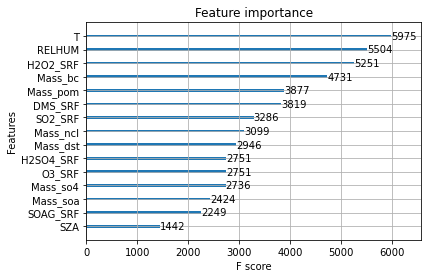

####################################


chi_hyg


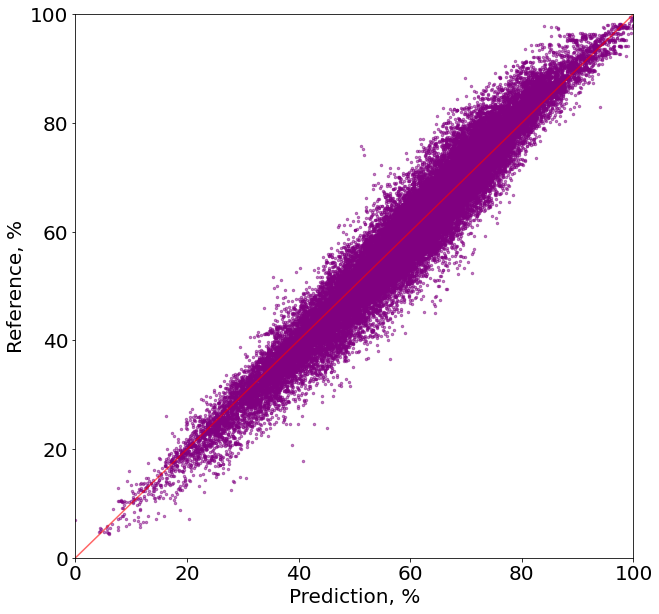

The cc is: 0.971
The coefficient of determination is: 0.941
The coefficient of determination (Using sklearn) is: 0.941
The index of agreement is: 0.984
The root mean squared error is: 0.040
The mean absolute error is: 0.030
The median absolute error is: 0.024


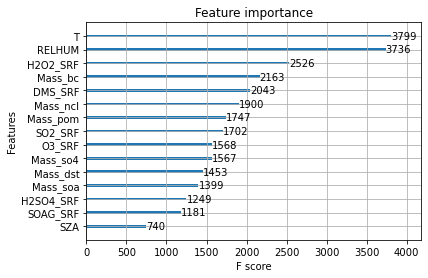

####################################




In [4]:
predict_chi_ls(df_train_ori.dropna(), vari, chi_ls)

## Apply to testing data

chi_abd


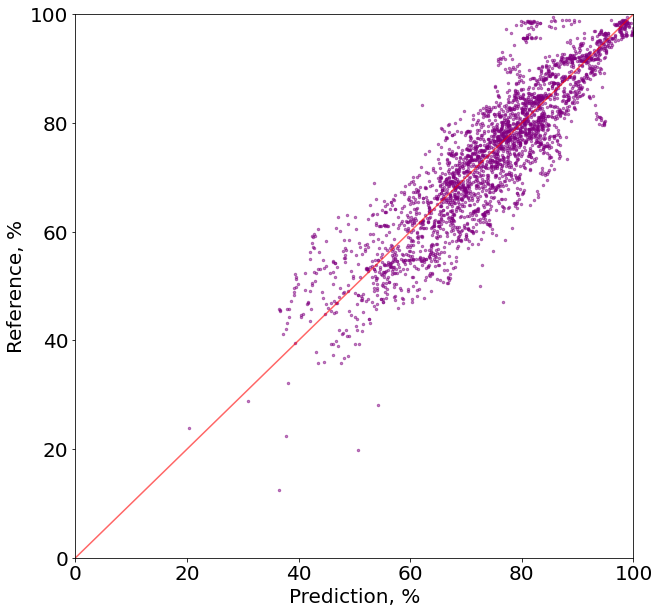

The cc is: 0.894
The coefficient of determination is: 0.796
The coefficient of determination (Using sklearn) is: 0.796
The index of agreement is: 0.943
The root mean squared error is: 0.062
The mean absolute error is: 0.047
The median absolute error is: 0.036


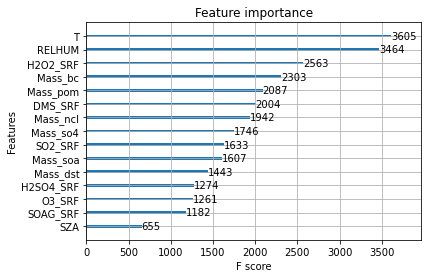

####################################


chi_opt1


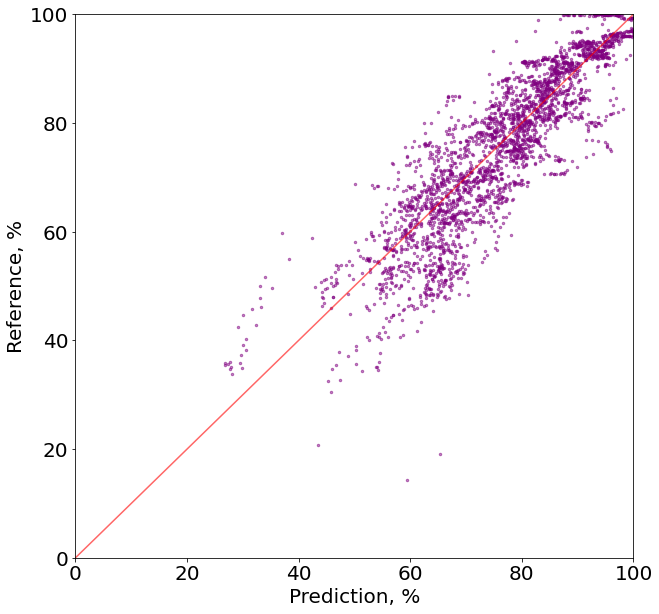

The cc is: 0.884
The coefficient of determination is: 0.778
The coefficient of determination (Using sklearn) is: 0.778
The index of agreement is: 0.935
The root mean squared error is: 0.069
The mean absolute error is: 0.053
The median absolute error is: 0.041


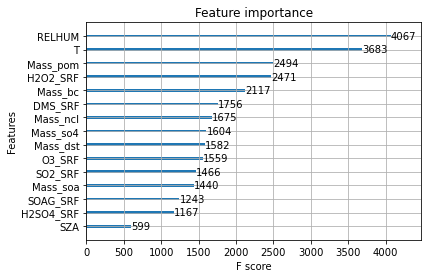

####################################


chi_opt2


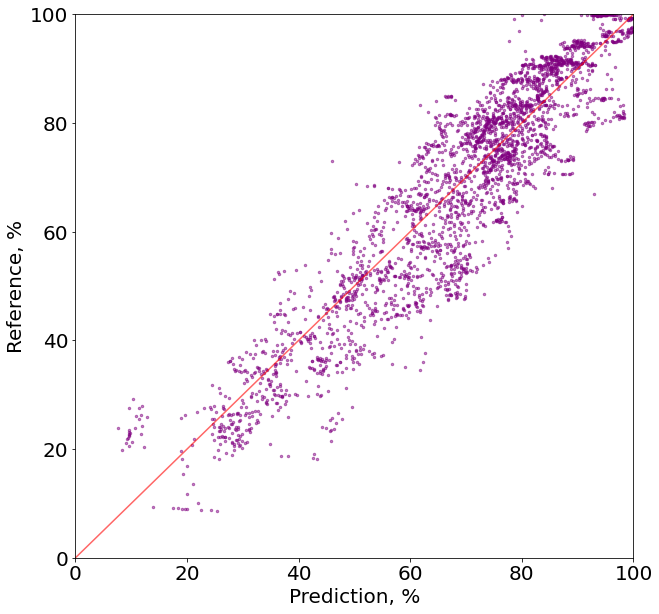

The cc is: 0.925
The coefficient of determination is: 0.854
The coefficient of determination (Using sklearn) is: 0.854
The index of agreement is: 0.959
The root mean squared error is: 0.080
The mean absolute error is: 0.064
The median absolute error is: 0.053


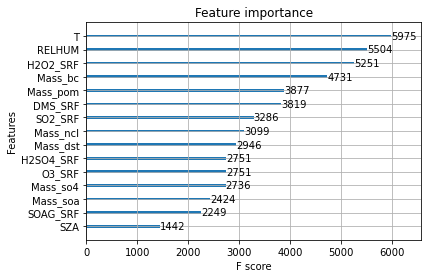

####################################


chi_hyg


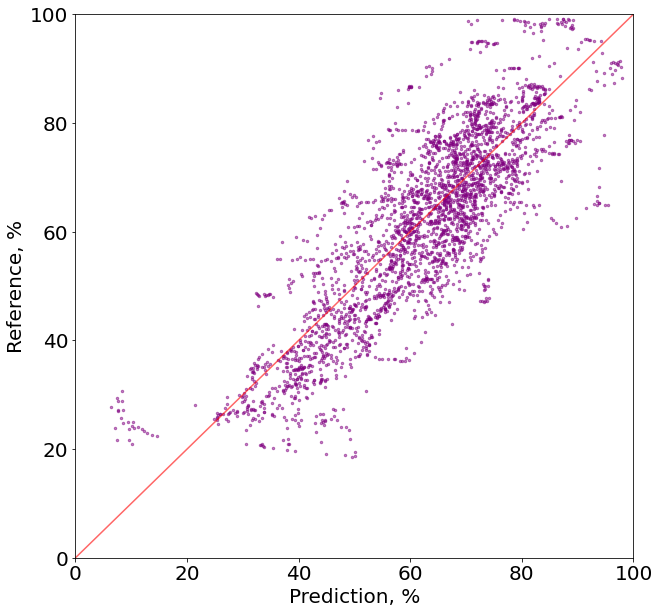

The cc is: 0.836
The coefficient of determination is: 0.696
The coefficient of determination (Using sklearn) is: 0.696
The index of agreement is: 0.907
The root mean squared error is: 0.094
The mean absolute error is: 0.074
The median absolute error is: 0.061


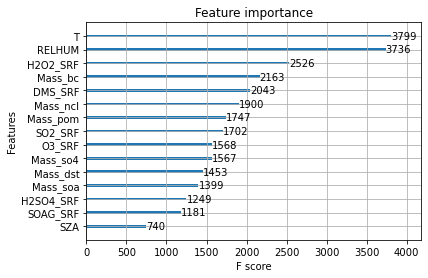

####################################




In [5]:
predict_chi_ls(df_test_ori.dropna(), vari, chi_ls)